<a href="https://colab.research.google.com/github/benedettacandelori/Monkeys_go_stop_trials/blob/main/Report_movement_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook shows only results obtained with the CNN arichitecture, built to validate the dataset for the prediction task. Trials have been made with different time sessions of the dataset, with the movement alignment. 

```
To run the code, you need to load data from the folder called *results_CNN_small* from the git hub repo!

```



 
It's clear from the results above that performances are more accurate the more the time sesssion is close to the movement. However good values of accurasies are raised till the time session 200-600 even if the training of the models is overfitted. 




# Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import math
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

In [ ]:
os.chdir('/content/drive/MyDrive')
os.getcwd() 

'/content/drive/MyDrive'

# Small CNN

In [ ]:
def plot_CNN_small_results(batchsize, num_epochs, learning_rate):
  
  # Load data from the directory '/content/drive/MyDrive/results_CNN_small'
  pickle_file_name = "b="+str(batchsize)+",ep="+str(num_epochs)+",lr="+str(learning_rate)+".pkl"
  f = open(pickle_file_name,"rb")
  final_results = pickle.load(f)
  f.close()
  f = open("complete_version: "+pickle_file_name,"rb")
  vecs_results = pickle.load(f)
  f.close()

  x_labs = []
  for i in range(len(final_results['time session']['start'])-2):
    x_labs.append(str(1000-final_results['time session']['start'][i+2])+'-'+str(1000-final_results['time session']['end'][i+2]))
  x_labs = x_labs[::-1]

  # Plot time session vs metrics
  plt.figure(figsize = (15,4))
  plt.subplot(1, 2, 1)
  plt.plot(x_labs,final_results['train']['accuracies'][2:][::-1], label = 'train', marker = 'o' )
  plt.plot(x_labs,final_results['val']['accuracies'][2:][::-1], label = 'val', marker = 'o')
  plt.xticks(rotation = 45, size = 'small')
  plt.xlabel('Range of ms before the movement that have been examined')
  plt.legend()
  plt.title('Accuracy for different time sessions',fontsize = 'medium')
  plt.subplot(1, 2, 2)
  plt.plot(x_labs,final_results['train']['losses'][2:][::-1], label = 'train', marker = 'o')
  plt.plot(x_labs,final_results['val']['losses'][2:][::-1], label = 'val', marker = 'o')
  plt.xticks(rotation = 45, size = 'small')
  plt.xlabel('Range of ms before the movement that have been examined')
  plt.legend()
  plt.title('Losses for different time sessions',fontsize = 'medium')
  plt.suptitle('Hyperparams: batch_size = '+str(batchsize)+', num_epochs = '+str(num_epochs)+', learning_rate = '+str(learning_rate), fontsize = 'large', fontweight="bold")
  plt.show()

def plot_CNN_small_running_results(batchsize, num_epochs, learning_rate):
  pickle_file_name = "b="+str(batchsize)+",ep="+str(num_epochs)+",lr="+str(learning_rate)+".pkl"
  f = open(pickle_file_name,"rb")
  final_results = pickle.load(f)
  f.close()
  f = open("complete_version: "+pickle_file_name,"rb")
  vecs_results = pickle.load(f)
  f.close()

  # Plot train/val accuracies over epochs
  fig, axs = plt.subplots(2, 4, figsize=(18, 5))
  idx = 0
  for i in range(2):
    for j in range(4):
      axs[i, j].plot(vecs_results['train']['accuracies'][idx], label = 'train', marker = 'o' ,markersize = 0.5)
      axs[i, j].plot(vecs_results['val']['accuracies'][idx], label = 'val', marker = 'o',markersize = 0.5)
      axs[i, j].set_title(str(1000-vecs_results['time session']['start'][idx])+'-'+str(1000-vecs_results['time session']['end'][idx]),fontsize = 'medium')
      axs[i, j].legend()
      idx += 2
  fig.suptitle('Running Accuracy')
  for ax in axs.flat:
      ax.set(xlabel='epochs', ylabel='Accuracy')
  # Hide x labels and tick labels for top plots and y ticks for right plots.
  for ax in axs.flat:
      ax.label_outer()

  # Plot train/val losses over epochs
  fig, axs = plt.subplots(2, 4, figsize=(18, 5))
  idx = 0
  for i in range(2):
    for j in range(4):
      axs[i, j].plot(vecs_results['train']['losses'][idx], label = 'train', marker = 'o' ,markersize = 0.5)
      axs[i, j].plot(vecs_results['val']['losses'][idx], label = 'val', marker = 'o',markersize = 0.5)
      axs[i, j].set_title(str(1000-vecs_results['time session']['start'][idx])+'-'+str(1000-vecs_results['time session']['end'][idx]), fontsize = 'medium')
      axs[i, j].legend()
      idx += 2
  fig.suptitle('Running losses')

  for ax in axs.flat:
      ax.set(xlabel='epochs', ylabel='Loss')
  # Hide x labels and tick labels for top plots and y ticks for right plots.
  for ax in axs.flat:
      ax.label_outer()


**Possible hyperparameters**

batch size = 4, 8, 16, 32

number of epochs = 25

learning rate = 0.001, 0.0005

In [ ]:
os.chdir('/content/drive/MyDrive/results_CNN_small')
os.getcwd() 

'/content/drive/.shortcut-targets-by-id/1k9tBM3XgkIiZJyHWOtMkNuR7_UY9b6d-/results_CNN_small'

In [ ]:
#HYPERPARAMS
n_epochs = 25
bs = 8
lr = 0.0005

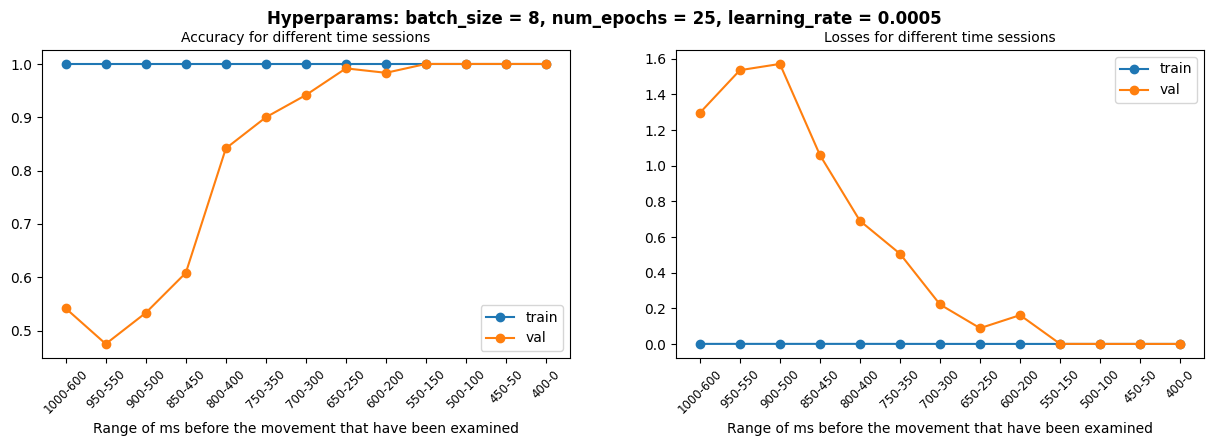

In [ ]:
plot_CNN_small_results(batchsize = bs, num_epochs = n_epochs, learning_rate = lr)

In [ ]:
pickle_file_name = "b="+str(bs)+",ep="+str(n_epochs)+",lr="+str(lr)+".pkl"
f = open(pickle_file_name,"rb")
final_results = pickle.load(f)
f.close()
f = open("complete_version: "+pickle_file_name,"rb")
vecs_results = pickle.load(f)
f.close()
x_labs = []
for i in range(len(final_results['time session']['start'])):
  x_labs.append(str(1000-final_results['time session']['start'][i])+'-'+str(1000-final_results['time session']['end'][i]))
x_labs = x_labs[::-1]
x_labs

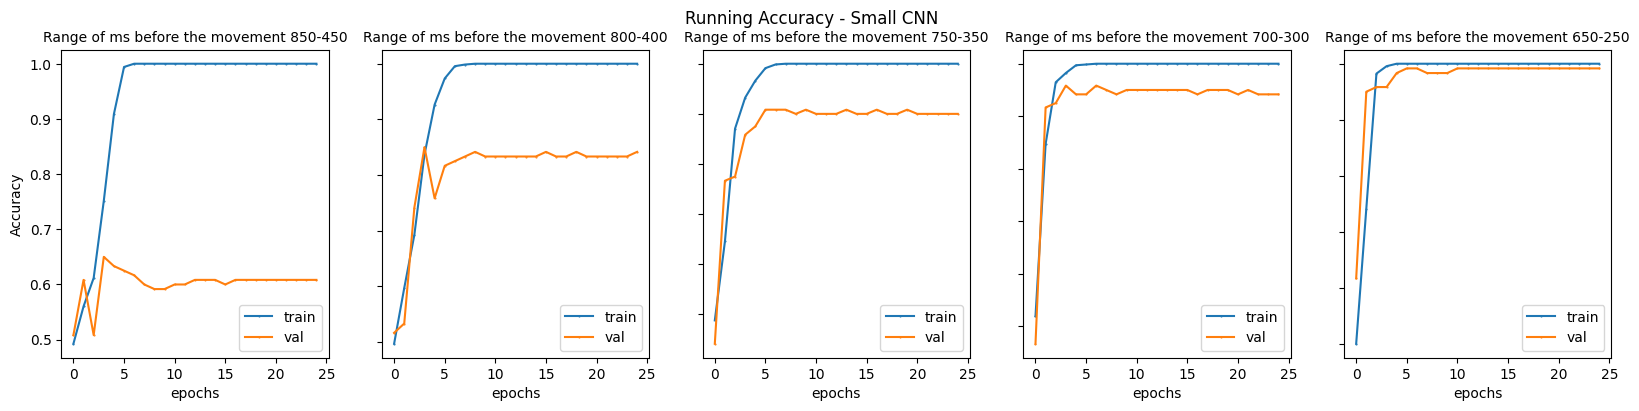

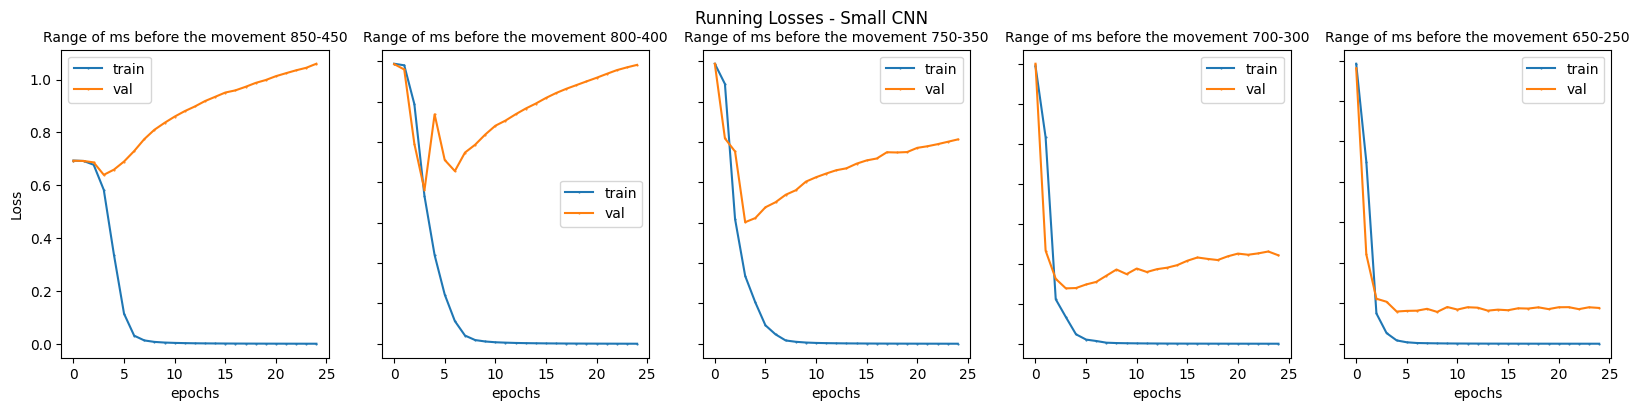

In [ ]:
# Plot train/val accuracies over epochs
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
  axs[i].plot(vecs_results['train']['accuracies'][::-1][3:8][i], label = 'train', marker = 'o' ,markersize = 0.5)
  axs[i].plot(vecs_results['val']['accuracies'][::-1][3:8][i], label = 'val', marker = 'o',markersize = 0.5)
  axs[i].set_title('Range of ms before the movement '+x_labs[3:8][i],fontsize = 'medium')
  axs[i].legend()

fig.suptitle('Running Accuracy - Small CNN')
for ax in axs.flat:
    ax.set(xlabel='epochs', ylabel='Accuracy')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig, axs = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
  axs[i].plot(vecs_results['train']['losses'][::-1][3:8][i], label = 'train', marker = 'o' ,markersize = 0.5)
  axs[i].plot(vecs_results['val']['losses'][::-1][3:8][i], label = 'val', marker = 'o',markersize = 0.5)
  axs[i].set_title('Range of ms before the movement '+x_labs[3:8][i],fontsize = 'medium')
  axs[i].legend()

fig.suptitle('Running Losses - Small CNN')
for ax in axs.flat:
    ax.set(xlabel='epochs', ylabel='Loss')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


# Large CNN

In [ ]:
def plot_CNN_large_results(batchsize, num_epochs, learning_rate):
  
  # Load data from the directory '/content/drive/MyDrive/results_CNN_small'
  pickle_file_name = "b="+str(batchsize)+",ep="+str(num_epochs)+",lr="+str(learning_rate)+"_large.pkl"
  f = open(pickle_file_name,"rb")
  final_results = pickle.load(f)
  f.close()
  f = open("complete_version: "+pickle_file_name,"rb")
  vecs_results = pickle.load(f)
  f.close()

  x_labs = []
  for i in range(len(final_results['time session']['start'])-2):
    x_labs.append(str(1000-final_results['time session']['start'][i+2])+'-'+str(1000-final_results['time session']['end'][i+2]))
  x_labs = x_labs[::-1]

  # Plot time session vs metrics
  plt.figure(figsize = (15,4))
  plt.subplot(1, 2, 1)
  plt.plot(x_labs,final_results['train']['accuracies'][2:][::-1], label = 'train', marker = 'o' )
  plt.plot(x_labs,final_results['val']['accuracies'][2:][::-1], label = 'val', marker = 'o')
  plt.xticks(rotation = 45, size = 'small')
  plt.xlabel('Range of ms before the movement that have been examined')
  plt.legend()
  plt.title('Accuracy for different time sessions',fontsize = 'medium')
  plt.subplot(1, 2, 2)
  plt.plot(x_labs,final_results['train']['losses'][2:][::-1], label = 'train', marker = 'o')
  plt.plot(x_labs,final_results['val']['losses'][2:][::-1], label = 'val', marker = 'o')
  plt.xticks(rotation = 45, size = 'small')
  plt.xlabel('Range of ms before the movement that have been examined')
  plt.legend()
  plt.title('Losses for different time sessions',fontsize = 'medium')
  plt.suptitle('Hyperparams: batch_size = '+str(batchsize)+', num_epochs = '+str(num_epochs)+', learning_rate = '+str(learning_rate), fontsize = 'large', fontweight="bold")
  plt.show()

def plot_CNN_large_running_results(batchsize, num_epochs, learning_rate):
  
  # Load data from the directory '/content/drive/MyDrive/results_CNN_large'
  pickle_file_name = "b="+str(batchsize)+",ep="+str(num_epochs)+",lr="+str(learning_rate)+"_large.pkl"
  f = open(pickle_file_name,"rb")
  final_results = pickle.load(f)
  f.close()
  f = open("complete_version: "+pickle_file_name,"rb")
  vecs_results = pickle.load(f)
  f.close()
  # Plot train/val accuracies over epochs
  fig, axs = plt.subplots(2, 5, figsize=(18, 5))
  idx = 0
  for i in range(2):
    for j in range(5):
      axs[i, j].plot(vecs_results['train']['accuracies'][idx][2:][::-1], label = 'train', marker = 'o' ,markersize = 0.5)
      axs[i, j].plot(vecs_results['val']['accuracies'][idx][2:][::-1], label = 'val', marker = 'o',markersize = 0.5)
      axs[i, j].set_title(str(1000-vecs_results['time session']['start'][idx])+'-'+str(1000-vecs_results['time session']['end'][idx]),fontsize = 'medium')
      axs[i, j].legend()
      idx += 1
  fig.suptitle('Running Accuracy')
  for ax in axs.flat:
      ax.set(xlabel='epochs', ylabel='Accuracy')
  # Hide x labels and tick labels for top plots and y ticks for right plots.
  for ax in axs.flat:
      ax.label_outer()

  # Plot train/val losses over epochs
  fig, axs = plt.subplots(2, 5, figsize=(18, 5))
  idx = 0
  for i in range(2):
    for j in range(5):
      axs[i, j].plot(vecs_results['train']['losses'][idx][2:][::-1], label = 'train', marker = 'o' ,markersize = 0.5)
      axs[i, j].plot(vecs_results['val']['losses'][idx][2:][::-1], label = 'val', marker = 'o',markersize = 0.5)
      axs[i, j].set_title(str(1000-vecs_results['time session']['start'][idx])+'-'+str(1000-vecs_results['time session']['end'][idx]), fontsize = 'medium')
      axs[i, j].legend()
      idx += 1
  fig.suptitle('Running losses')

  for ax in axs.flat:
      ax.set(xlabel='epochs', ylabel='Loss')
  # Hide x labels and tick labels for top plots and y ticks for right plots.
  for ax in axs.flat:
      ax.label_outer()

  


**Possible hyperparameters**

batch size =  8, 16, 32

number of epochs, learning rate= (25, 0.0002), (30, 0.0001) 

In [ ]:
os.chdir('/content/drive/MyDrive/results_CNN_large')
os.getcwd() 

'/content/drive/MyDrive/results_CNN_large'

In [ ]:
#HYPERPARAMS
n_epochs = 30
bs = 8
lr = 0.0001

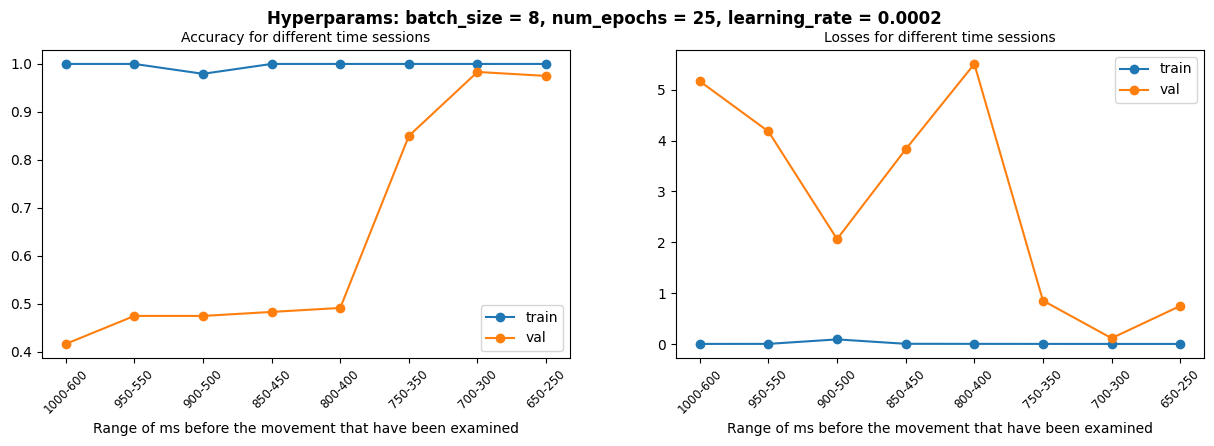

In [ ]:
plot_CNN_large_results(batchsize = bs, num_epochs = n_epochs, learning_rate = lr)

In [ ]:
pickle_file_name = "b="+str(bs)+",ep="+str(n_epochs)+",lr="+str(lr)+"_large.pkl"
f = open(pickle_file_name,"rb")
final_results = pickle.load(f)
f.close()
f = open("complete_version: "+pickle_file_name,"rb")
vecs_results = pickle.load(f)
f.close()
x_labs = []
for i in range(len(final_results['time session']['start'])):
  x_labs.append(str(1000-final_results['time session']['start'][i])+'-'+str(1000-final_results['time session']['end'][i]))
x_labs = x_labs[::-1]
x_labs

['1000-600',
 '950-550',
 '900-500',
 '850-450',
 '800-400',
 '750-350',
 '700-300',
 '650-250',
 '600-200',
 '550-150']

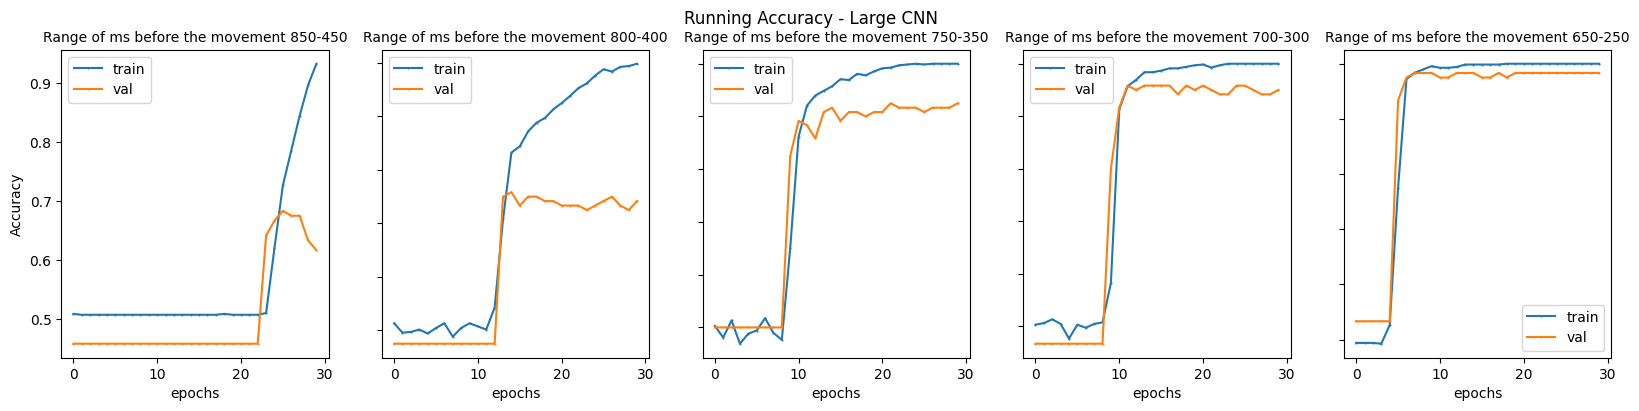

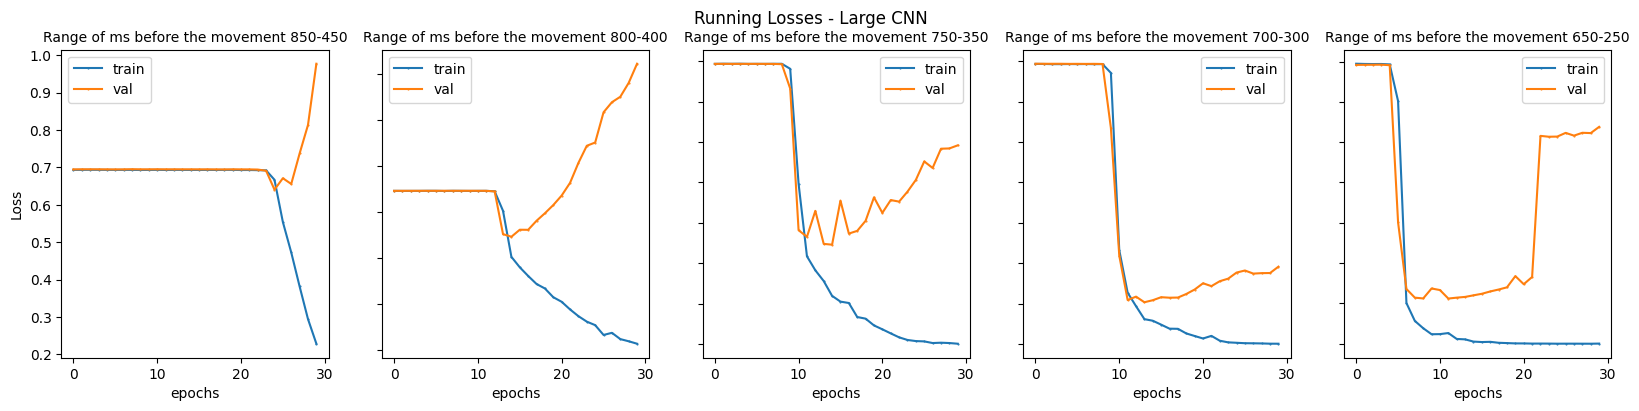

In [ ]:
# Plot train/val accuracies over epochs
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
  axs[i].plot(vecs_results['train']['accuracies'][::-1][3:8][i], label = 'train', marker = 'o' ,markersize = 0.5)
  axs[i].plot(vecs_results['val']['accuracies'][::-1][3:8][i], label = 'val', marker = 'o',markersize = 0.5)
  axs[i].set_title('Range of ms before the movement '+x_labs[3:8][i],fontsize = 'medium')
  axs[i].legend()

fig.suptitle('Running Accuracy - Large CNN')
for ax in axs.flat:
    ax.set(xlabel='epochs', ylabel='Accuracy')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig, axs = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
  axs[i].plot(vecs_results['train']['losses'][::-1][3:8][i], label = 'train', marker = 'o' ,markersize = 0.5)
  axs[i].plot(vecs_results['val']['losses'][::-1][3:8][i], label = 'val', marker = 'o',markersize = 0.5)
  axs[i].set_title('Range of ms before the movement '+x_labs[3:8][i],fontsize = 'medium')
  axs[i].legend()

fig.suptitle('Running Losses - Large CNN')
for ax in axs.flat:
    ax.set(xlabel='epochs', ylabel='Loss')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()